# Rotation Matrices

## Task 6

a) Find the $3 × 3$ matrix $Y$ that describes a rotation by $30°$ about the y-axis in
3-dimensional space.

b) Find the $3 × 3$ matrix $X$ that describes a rotation by $45°$ about the x-axis in
3-dimensional space.

c) Compute the products $Y X$ and $XY$ . Draw sequences of pictures of cubes to
visualize both rotations (imitate what we did for $90°$
rotations in the lecture:
draw the cube in original position, then after having applied the first rotation,
and in final position after the second rotation.)


YX sequential rotations match matrix product: False
XY sequential rotations match matrix product: False


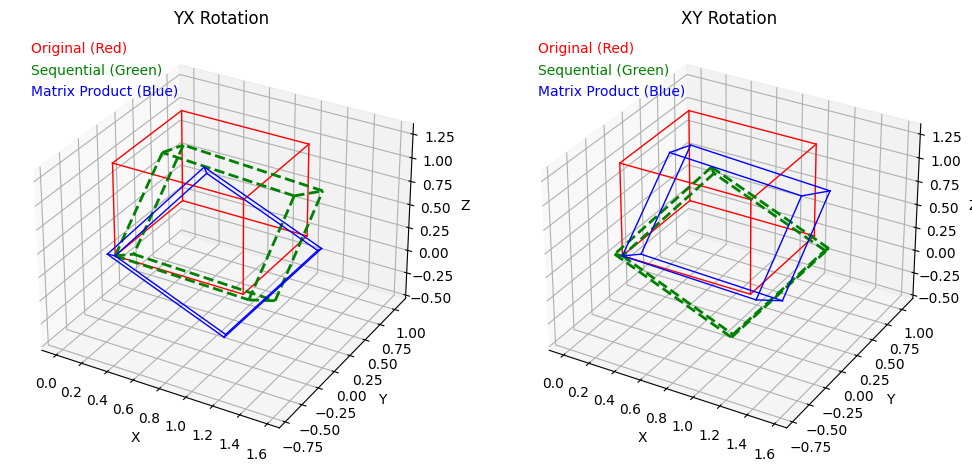

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

"""
angle in degrees rounded to 2 decimal places to match paper homework
"""
def rotation_matrix(axis, angle):
    angle = np.radians(angle)
    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, np.round(np.cos(angle),3), - np.round(np.sin(angle),3)],
                      [0, np.round(np.sin(angle),3), np.round(np.cos(angle),3)]])
    elif axis == 'y':
        R = np.array([[np.round(np.cos(angle),3), 0, np.round(np.sin(angle),3)],
                      [0, 1, 0],
                      [-np.round(np.sin(angle),3), 0, np.round(np.cos(angle),3)]])
    return R


def plot_cube(ax, vertices, color='b', linestyle='-', linewidth=1):
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),  # lower face edges
        (4, 5), (5, 6), (6, 7), (7, 4),  # upper face edges
        (0, 4), (1, 5), (2, 6), (3, 7)   # side edges
    ]

    for edge in edges:
        ax.plot(*vertices[[edge[0], edge[1]]].T, color=color, linestyle=linestyle, linewidth=linewidth)

def add_labels(ax):
    ax.text2D(0.05, 0.95, 'Original (Red)', transform=ax.transAxes, color='r')
    ax.text2D(0.05, 0.90, 'Sequential (Green)', transform=ax.transAxes, color='g')
    ax.text2D(0.05, 0.85, 'Matrix Product (Blue)', transform=ax.transAxes, color='b')

def annotate_vertices(ax, vertices, color='k', offset=0.1):
    for i, vertex in enumerate(vertices):
        ax.text(vertex[0] + offset, vertex[1] + offset, vertex[2] + offset, str(i), color=color)


# input vertices and rotation matrix
cube_vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

Rx = rotation_matrix('x', 45)
Ry = rotation_matrix('y', 30)


# Calculate the matrix products YX and XY
YX = np.dot(Ry, Rx)
XY = np.dot(Rx, Ry)

# Apply sequential rotations (Y, then X) to the original vertices
vertices_y = np.dot(cube_vertices, Ry.T)
vertices_yx_seq = np.dot(vertices_y, Rx.T)

# Apply sequential rotations (X, then Y) to the original vertices
vertices_x = np.dot(cube_vertices, Rx.T)
vertices_xy_seq = np.dot(vertices_x, Ry.T)

# Apply the YX and XY matrices to the original vertices
vertices_yx_mat = np.dot(cube_vertices, YX.T)
vertices_xy_mat = np.dot(cube_vertices, XY.T)

print("YX sequential rotations match matrix product:", np.allclose(vertices_yx_seq, vertices_yx_mat, atol=1e-6))
print("XY sequential rotations match matrix product:", np.allclose(vertices_xy_seq, vertices_xy_mat, atol=1e-6))

# Plot the results
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

plot_cube(ax1, cube_vertices, color='r')
plot_cube(ax1, vertices_yx_seq, color='g', linestyle='--', linewidth=2)
plot_cube(ax1, vertices_yx_mat, color='b')
ax1.set_title('YX Rotation')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

plot_cube(ax2, cube_vertices, color='r')
plot_cube(ax2, vertices_xy_seq, color='g', linestyle='--', linewidth=2)
plot_cube(ax2, vertices_xy_mat, color='b')
ax2.set_title('XY Rotation')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# In the plotting section, call the new function
add_labels(ax1)
add_labels(ax2)

# # In the plotting section, call the new function
# annotate_vertices(ax1, cube_vertices, color='r')
# annotate_vertices(ax1, vertices_yx_seq, color='g')
# annotate_vertices(ax1, vertices_yx_mat, color='b')
# annotate_vertices(ax2, cube_vertices, color='r')
# annotate_vertices(ax2, vertices_xy_seq, color='g')
# annotate_vertices(ax2, vertices_xy_mat, color='b')

plt.show()

In [3]:
print(vertices_yx_seq, '\n \n', vertices_yx_mat)
print(vertices_xy_seq, '\n \n', vertices_xy_mat)

[[ 0.        0.        0.      ]
 [ 0.866     0.3535   -0.3535  ]
 [ 0.866     1.0605    0.3535  ]
 [ 0.        0.707     0.707   ]
 [ 0.5      -0.612262  0.612262]
 [ 1.366    -0.258762  0.258762]
 [ 1.366     0.448238  0.965762]
 [ 0.5       0.094738  1.319262]] 
 
 [[ 0.        0.        0.      ]
 [ 0.866     0.       -0.5     ]
 [ 1.2195    0.707     0.112262]
 [ 0.3535    0.707     0.612262]
 [ 0.3535   -0.707     0.612262]
 [ 1.2195   -0.707     0.112262]
 [ 1.573     0.        0.724524]
 [ 0.707     0.        1.224524]]
[[ 0.        0.        0.      ]
 [ 0.866     0.       -0.5     ]
 [ 1.2195    0.707     0.112262]
 [ 0.3535    0.707     0.612262]
 [ 0.3535   -0.707     0.612262]
 [ 1.2195   -0.707     0.112262]
 [ 1.573     0.        0.724524]
 [ 0.707     0.        1.224524]] 
 
 [[ 0.        0.        0.      ]
 [ 0.866     0.3535   -0.3535  ]
 [ 0.866     1.0605    0.3535  ]
 [ 0.        0.707     0.707   ]
 [ 0.5      -0.612262  0.612262]
 [ 1.366    -0.258762  0.258762]

In [2]:
import numpy as np
import plotly.graph_objects as go

#helper function to create edges
def create_edges(vertices, color='blue'):
    edge_x = []
    edge_y = []
    edge_z = []
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),  # lower face edges
        (4, 5), (5, 6), (6, 7), (7, 4),  # upper face edges
        (0, 4), (1, 5), (2, 6), (3, 7)   # side edges
    ]

    for edge in edges:
        edge_x.extend([vertices[edge[0], 0], vertices[edge[1], 0], None])
        edge_y.extend([vertices[edge[0], 1], vertices[edge[1], 1], None])
        edge_z.extend([vertices[edge[0], 2], vertices[edge[1], 2], None])

    return edge_x, edge_y, edge_z, color

# Create edge traces for Plotly
original_x, original_y, original_z, original_color = create_edges(cube_vertices, color='red')
yx_seq_x, yx_seq_y, yx_seq_z, yx_seq_color = create_edges(vertices_yx_seq, color='green')
yx_mat_x, yx_mat_y, yx_mat_z, yx_mat_color = create_edges(vertices_yx_mat, color='blue')
xy_seq_x, xy_seq_y, xy_seq_z, xy_seq_color = create_edges(vertices_xy_seq, color='green')
xy_mat_x, xy_mat_y, xy_mat_z, xy_mat_color = create_edges(vertices_xy_mat, color='blue')

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=original_x, y=original_y, z=original_z,
                           mode='lines', line=dict(color=original_color, width=4, dash='dot'),
                           name='Original (Red)'))

fig.add_trace(go.Scatter3d(x=yx_seq_x, y=yx_seq_y, z=yx_seq_z,
                           mode='lines', line=dict(color=yx_seq_color, width=4,),
                           name='Sequential YX (Green)'))

fig.add_trace(go.Scatter3d(x=yx_mat_x, y=yx_mat_y, z=yx_mat_z,
                           mode='lines', line=dict(color=yx_mat_color, width=4),
                           name='Matrix Product YX (Blue)'))


# fig.add_trace(go.Scatter3d(x=xy_seq_x, y=xy_seq_y, z=xy_seq_z,
#                            mode='lines', line=dict(color=xy_seq_color, width=4, dash='dash'),
#                            name='Sequential XY (Green)'))
# fig.add_trace(go.Scatter3d(x=xy_mat_x, y=xy_mat_y, z=xy_mat_z,
#                            mode='lines', line=dict(color=xy_mat_color, width=4),
#                            name='Matrix Product XY (Blue)'))

fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  title='Cube Rotations: YX',
                  width=1200, height=600, showlegend=True)

fig.show()


![Image](https://i.gyazo.com/17cfb3c2e112cd4bfffea8a4d1e76a33.png)